## Importamos las librerías

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pyromat as pyro
%matplotlib inline

## Configuración de unidades

In [4]:
pyro.config["unit_pressure"]="kPa"

## Establecer los datos conocidos

In [5]:
# datos vapor agua
p_1 = p_4 = 5 #kpa inferior
x_1 = 0
p_2 = p_3 = 7e3 # kpa superior
T_3 = 500 + 273.15 # K salida intercambiador

# datos aire
T_5 = 300 # K entrada compresor
T_7 = 1300 # K entrada turbina
T_9 = 450 # K salida intercambiador
relacion_presiones = 8
eficiencia_compresor = 0.8
eficiencia_turbina = 0.85

## Definir los fluidos de trabajo

In [6]:
agua = pyro.get('mp.H2O')
aire = pyro.get('ig.air')

## Establecer los estados conocidos con las variables que tenemos

In [7]:
state_1 = agua.state(p=p_1,x=x_1)
h_1 = state_1.get("h")[0]
s_1 = state_1.get("s")[0]
T_1 = state_1.get("T")[0]
v_1 = state_1.get("v")[0]
state_1

{'p': array([5.00006645]),
 'T': array([306.02426473]),
 'd': array([994.69887933]),
 'x': array([0.]),
 'e': array([137.74605276]),
 'h': array([137.74134764]),
 's': array([0.47620667]),
 'cp': array([inf]),
 'cv': array([nan]),
 'gam': array([inf]),
 'v': array([0.00100533])}

In [9]:
state_3 = agua.state(p=p_3,T= T_3)
h_3 = state_3.get("h")[0]
s_3 = state_3.get("s")[0]
v_3 = state_3.get("v")[0]
state_3

{'p': array([6999.99999385]),
 'T': array([773.15]),
 'd': array([20.76519422]),
 'x': array([-1.]),
 'e': array([3074.32846486]),
 'h': array([3411.43101833]),
 's': array([6.80002982]),
 'cp': array([2.42613447]),
 'cv': array([1.78897908]),
 'gam': array([1.35615586]),
 'v': array([0.04815751])}

In [11]:
state_5 = aire.state(T=T_5)
h_5 = state_5.get("h")[0]
s_5 = state_5.get("s")[0]
v_5 = state_5.get("v")[0]
state_5

{'T': array([300.]),
 'p': array([1.01325]),
 'd': array([0.01176613]),
 'v': array([84.98968434]),
 'h': array([-2.4071345]),
 'e': array([-88.52293216]),
 'gam': array([1.39991606]),
 's': array([8.02585047]),
 'cp': array([1.00483493]),
 'cv': array([0.71778227])}

In [13]:
state_7 = aire.state(T=T_7)
h_7 = state_7.get("h")[0]
s_7 = state_7.get("s")[0]
v_7 = state_7.get("v")[0]
state_7

{'T': array([1300.]),
 'p': array([1.01325]),
 'd': array([0.00271526]),
 'v': array([368.28863214]),
 'h': array([1092.80276699]),
 'e': array([719.63431047]),
 'gam': array([1.31970267]),
 's': array([9.59720945]),
 'cp': array([1.18492647]),
 'cv': array([0.89787381])}

In [15]:
state_9 = aire.state(T=T_9)
h_9 = state_9.get("h")[0]
s_9 = state_9.get("s")[0]
v_9 = state_9.get("v")[0]
state_9

{'T': array([450.]),
 'p': array([1.01325]),
 'd': array([0.00784409]),
 'v': array([127.48452651]),
 'h': array([149.36743277]),
 'e': array([20.19373629]),
 'gam': array([1.39092577]),
 's': array([8.43588867]),
 'cp': array([1.02134208]),
 'cv': array([0.73428942])}

### Concepto de proceso isentropic 1 -> 2

In [8]:
state_2 = agua.state(p=p_2,s=s_1)
h_2 = state_2.get("h")[0]
s_2 = state_2.get("s")[0]
v_2 = state_2.get("v")[0]
T_2 = state_2.get("T")[0]
state_2

{'p': array([7000.00006281]),
 'T': array([306.19512434]),
 'd': array([997.72475991]),
 'x': array([-1]),
 'e': array([137.75667701]),
 'h': array([144.77264007]),
 's': array([0.47620666]),
 'cp': array([4.16171129]),
 'cv': array([4.08349729]),
 'gam': array([1.01915368]),
 'v': array([0.00100228])}

### Concepto de proceso isentropico 3 -> 4

In [10]:
state_4 = agua.state(p=p_4,s=s_3)
h_4 = state_4.get("h")[0]
s_4 = state_4.get("s")[0]
v_4 = state_4.get("v")[0]
T_4 = state_4.get("T")[0]
x_4 = state_4.get("x")[0]
state_4

{'p': array([5.00006645]),
 'T': array([306.02426473]),
 'd': array([0.04442147]),
 'x': array([0.79869675]),
 'e': array([1960.43495642]),
 'h': array([2072.99268689]),
 's': array([6.80002982]),
 'cp': array([inf]),
 'cv': array([nan]),
 'gam': array([inf]),
 'v': array([22.51163872])}

### Calculo del estado 6

1. Suponga que es isentropico. 
2. Corregir el valor de la entalpía con la eficiencia

In [12]:
k_5_6 = 1.39
T_6s = T_5 * pow(1/relacion_presiones, (1- k_5_6)/k_5_6)
h_6s = aire.h(T=T_6s)[0]
h_6a = h_5 + (h_6s - h_5)/eficiencia_compresor
T_6a = aire.T(h=h_6a)[0]
state_6 = aire.state(T=T_6a)
h_6a = state_6.get("h")[0]
s_6a = state_6.get("s")[0]
v_6a = state_6.get("v")[0]
state_6

{'T': array([595.64339599]),
 'p': array([1.01325]),
 'd': array([0.0059261]),
 'v': array([168.74514735]),
 'h': array([300.05498174]),
 'e': array([129.07396119]),
 'gam': array([1.37648624]),
 's': array([8.72581004]),
 'cp': array([1.04950458]),
 'cv': array([0.76245192])}

### Calculo del estado 8

1. Suponga que es isentropico. 
2. Corregir el valor de la entalpía con la eficiencia

In [14]:
k_7_8 = 1.34
T_8s = T_7 * pow(relacion_presiones, (1- k_7_8)/k_7_8)
h_8s = aire.h(T=T_8s)[0]
h_8a = h_7 - (h_7 - h_8s)*eficiencia_turbina
T_8a = aire.T(h=h_8a)[0]
state_8a = aire.state(T=T_8a)
h_8a = state_8a.get("h")[0]
s_8a = state_8a.get("s")[0]
v_8a = state_8a.get("v")[0]
state_8a


{'T': array([850.06683602]),
 'p': array([1.01325]),
 'd': array([0.00415243]),
 'v': array([240.8230402]),
 'h': array([574.78199999]),
 'e': array([330.7680545]),
 'gam': array([1.34858851]),
 's': array([9.10921815]),
 'cp': array([1.11052403]),
 'cv': array([0.82347137])}

## Calculo de la relación de flujos másicos

In [16]:
relacion_flujo_masico = - (h_9 - h_8a)/ (h_3- h_2)
print("Relación de flujo masico: ", relacion_flujo_masico)

Relación de flujo masico:  0.13022927957514832


In [28]:
calor_salida_vapor = - (h_1 - h_4)
calor_salida_vapor

1935.251339244318

In [20]:
calor_entrada_vapor = h_3 - h_2
calor_entrada_vapor

3266.6583782589387

## Calculo de eficiencias.

### Calculo de la eficiencia del ciclo rankine a partir de los calores.

In [30]:
eficiencia_vapor = 1 - calor_salida_vapor/calor_entrada_vapor 
eficiencia_vapor

0.4075746174977235

### Calculo de la eficiencia del ciclo rankine a partir del trabajo neto

In [31]:
trabajo_bomba = h_2 - h_1
trabajo_bomba

7.031292428410666

In [32]:
trabajo_turbina_vapor = h_3 - h_4
trabajo_turbina_vapor

1338.4383314430315

In [34]:
trabajo_neto_vapor = trabajo_turbina_vapor - trabajo_bomba
trabajo_neto_vapor

1331.4070390146208

In [35]:
eficiencia_rankine = trabajo_neto_vapor/calor_entrada_vapor
eficiencia_rankine

0.4075746174977235

### Calculo de la eficiencia del ciclo Brayton a partir de calores

In [17]:
calor_entrada_aire = h_7 - h_6a
calor_entrada_aire

792.747785247717

In [18]:
calor_salida_aire = - (h_5 - h_8a)
calor_salida_aire

577.189134489169

In [36]:
eficiencia_brayton = 1 - calor_salida_aire/calor_entrada_aire
eficiencia_brayton

0.27191328032684514

### Calculo de la eficiencia de ciclo Brayton a partir de trabajo

In [37]:
trabajo_compresor = h_6a - h_5
trabajo_compresor

302.4621162363219

In [38]:
trabajo_turbina_aire = h_7 - h_8a
trabajo_turbina_aire

518.02076699487

In [39]:
trabajo_neto_aire = trabajo_turbina_aire - trabajo_compresor
trabajo_neto_aire

215.55865075854808

In [40]:
eficiencia_brayton = trabajo_neto_aire/calor_entrada_aire
eficiencia_brayton

0.2719132803268451

## Calculo de eficiencia  del ciclo combinado

### Por medio de trabajo

In [41]:
trabajo_neto_ciclo = trabajo_neto_aire + relacion_flujo_masico*trabajo_neto_vapor
trabajo_neto_ciclo

388.9468302707036

In [43]:
eficiencia_ciclo_combinado = trabajo_neto_ciclo/(calor_entrada_aire)
eficiencia_ciclo_combinado

0.4906312417500679

### Por medio de calores

In [45]:
calor_neto_salida = calor_salida_aire + relacion_flujo_masico * calor_salida_vapor

In [24]:
calor_neto_entrada = calor_entrada_aire + relacion_flujo_masico * calor_entrada_vapor

In [48]:
eficiencia_ciclo_combinado = 1 - calor_neto_salida/calor_entrada_aire
eficiencia_ciclo_combinado

-0.04600168884317357

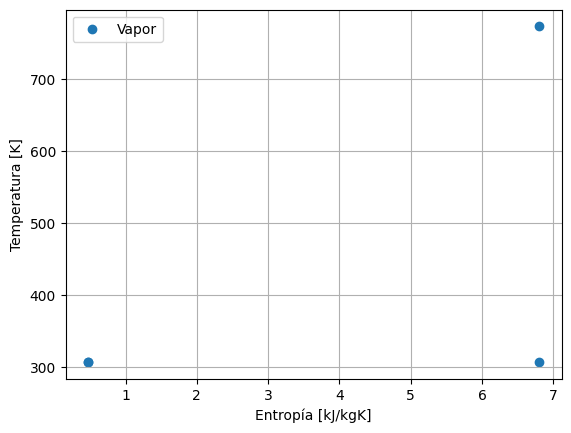

In [26]:
plt.scatter([s_1,s_2,s_3,s_4],[T_1, T_2, T_3, T_4], label="Vapor")
# plt.plot([s_5,s_6a,s_7,s_8a,s_9],[h_5,h_6a,h_7,h_8a,h_9], label="Aire")
plt.legend()
plt.xlabel("Entropía [kJ/kgK]")
plt.ylabel("Temperatura [K]")
plt.grid(True)
plt.show()


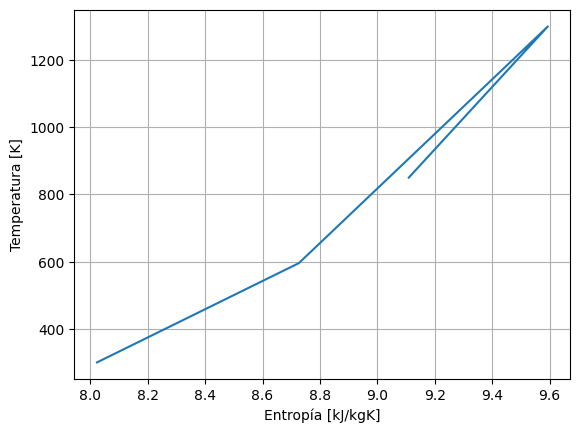

In [27]:
entropies = np.array([s_5, s_6a, s_7, s_8a, s_9], dtype=np.float16)
temperatures = np.array([T_5, T_6a, T_7, T_8a, T_9], dtype= np.float16)
plt.plot(entropies[:4], temperatures[:4], label="Aire")
# plt.legend()
plt.xlabel("Entropía [kJ/kgK]")
plt.ylabel("Temperatura [K]")
plt.grid(True)
plt.show()